# Analysation of latency data
In this notebook we want to analyse all the latency data



### what do i want to analyse?
- distribution of latency
- correlation between input size and latency measures

In [61]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
from utils import *
import pandas as pd
from pathlib import Path

## 1) Load Dataset

In [63]:
# Define root results directory
results_dir = Path('../results')

# Find all files containing "stats" and ending with .csv in all subdirectories
stats_files = sorted(results_dir.glob('**/*stats*.csv'))

# Find all files containing "raw" and ending with .csv in all subdirectories
raw_files = sorted(results_dir.glob('**/*raw*.csv'))

print(f"Found {len(stats_files)} stats CSV files and {len(raw_files)} raw CSV files:")

# Load all stats files into a dictionary of dataframes
stats_dfs = {}
for file_path in stats_files:
    try:
        df = pd.read_csv(file_path)
        # Strip whitespace from column names
        df.columns = df.columns.str.strip()
        # Create key: subfolder_name/filename_stem
        relative_path = file_path.relative_to(results_dir)
        key = str(relative_path.parent / relative_path.stem)
        stats_dfs[key] = df
        print(f"✅ {relative_path} -> shape {df.shape}")
    except Exception as e:
        print(f"❌ Error loading {file_path.name}: {e}")

# Load all raw files into a dictionary of dataframes
raw_dfs = {}
for file_path in raw_files:
    try:
        df = pd.read_csv(file_path)
        # Strip whitespace from column names
        df.columns = df.columns.str.strip()
        # Create key: subfolder_name/filename_stem
        relative_path = file_path.relative_to(results_dir)
        key = str(relative_path.parent / relative_path.stem)
        raw_dfs[key] = df
        print(f"✅ {relative_path} -> shape {df.shape}")
    except Exception as e:
        print(f"❌ Error loading {file_path.name}: {e}")

print(f"\n✅ Loaded {len(stats_dfs)} stats dataframes and {len(raw_dfs)} raw dataframes ✅")

Found 25 stats CSV files and 25 raw CSV files:
✅ cloud/cloud_stats_experiment_anthropic-claude-haiku-4-5_always_cloud_once-per-sec_2025-12-05T10-35-38.csv -> shape (3, 7)
✅ cloud/cloud_stats_experiment_google-gemini-2-5-flash-always_cloud_once_per_sec_2025-12-05T10-00-00.csv -> shape (3, 7)
✅ cloud/cloud_stats_experiment_google-gemma-3n-e4b-it_always_cloud_once-per-sec_2025-12-05T08-07-39.csv -> shape (3, 7)
✅ cloud/cloud_stats_experiment_ibm-granite-granite-4-0-h-micro_always_cloud_once-per-sec_2025-12-05T07-07-33.csv -> shape (3, 7)
✅ cloud/cloud_stats_experiment_meta-llama-llama-3-2-1b-instruct_always_cloud_once-per-sec_2025-12-04T16-10-54.csv -> shape (3, 7)
✅ cloud/cloud_stats_experiment_meta-llama-llama-3-2-3b-instruct_always_cloud_once-per-sec_2025-12-05T07-31-00.csv -> shape (3, 7)
✅ cloud/cloud_stats_experiment_openai-gpt-4o-mini_always_cloud_once-per-sec_2025-12-05T07-18-02.csv -> shape (3, 7)
✅ cloud/cloud_stats_experiment_qwen-qwen3-8b_always_cloud_once-per-sec_2025-12-05T0

In [64]:
# raw_dfs['fabian\\raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-03T20-41-45']

In [65]:
# Check the keys in raw_dfs
print("Available keys in raw_dfs:")
for key in raw_dfs.keys():
    print(key)

Available keys in raw_dfs:
cloud/cloud_raw_experiment_anthropic-claude-haiku-4-5_always_cloud_once-per-sec_2025-12-05T10-35-38
cloud/cloud_raw_experiment_google-gemini-2-5-flash-always_cloud_once_per_sec_2025-12-05T10-00-00
cloud/cloud_raw_experiment_google-gemma-3n-e4b-it_always_cloud_once-per-sec_2025-12-05T08-07-39
cloud/cloud_raw_experiment_ibm-granite-granite-4-0-h-micro_always_cloud_once-per-sec_2025-12-05T07-07-33
cloud/cloud_raw_experiment_meta-llama-llama-3-2-1b-instruct_always_cloud_once-per-sec_2025-12-04T16-10-54
cloud/cloud_raw_experiment_meta-llama-llama-3-2-3b-instruct_always_cloud_once-per-sec_2025-12-05T07-31-00
cloud/cloud_raw_experiment_openai-gpt-4o-mini_always_cloud_once-per-sec_2025-12-05T07-18-02
cloud/cloud_raw_experiment_qwen-qwen3-8b_always_cloud_once-per-sec_2025-12-05T07-52-16
fabian/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-03T20-58-00
fabian/raw_experiment_Qwen3-4B-ONNX_always_device_once-per-sec_2025-12-06T10-14-33
fabia

## 2) Inference Time vs. Accuracy

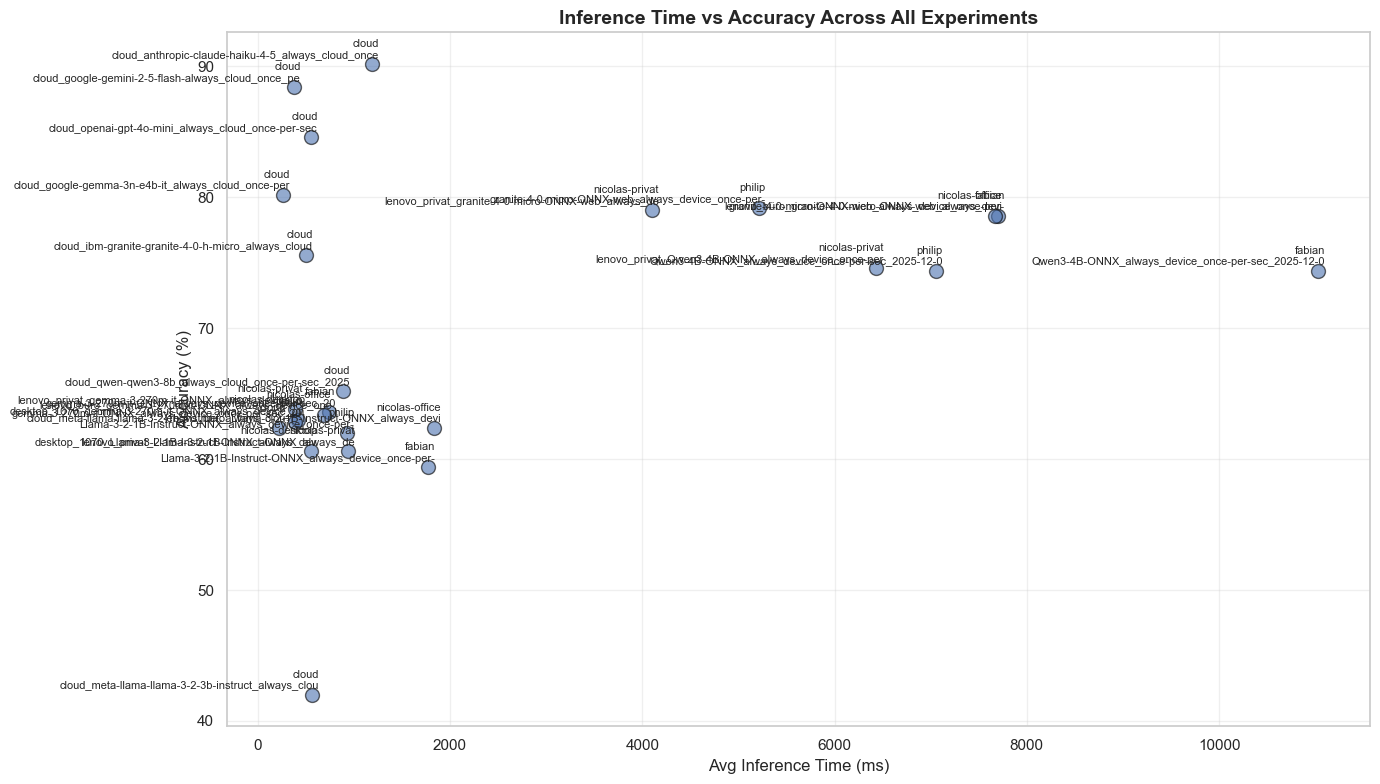

In [66]:
# Call the function with the stats_dfs dictionary
# TODO: shorten the labels (maybe just "granite micro" instead of ibm-granite-granite-4-0-h-micro). Would do this with a lookup table. Maybe add directly on data loading step.
# TODO: color the dots based on cloud vs. on device
# TODO: optional: make the size of the dots depending on the model size
scatterplot_inference_vs_accuracy(stats_dfs)

In [67]:
# plot_time_measure_distributions(raw_dfs['fabian/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-03T20-58-00'], 'Llama Fabian')
# plot_time_measure_distributions(raw_dfs['philip\\raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T08-10-53'], 'Llama Philip')
#plot_time_measure_distributions(raw_dfs['nicolas/lenovo_büro_raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T13-03-58'], 'Llama Nicolas Büro')


In [68]:
# Prepare the data for plotting
experiment_data = [
    raw_dfs['fabian/raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-03T20-41-45'],
    raw_dfs['philip/raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-04T08-01-13'],
    raw_dfs['nicolas/lenovo_büro_raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-04T12-44-34']
]

labels = ['gemma Fabian', 'gemma Philip', 'gemma Nicolas Büro']

# plot time measure distributions
plot_time_measures_overlaid(experiment_data, labels)

# plot inference vs input character amount
plot_characters_vs_inference_time(experiment_data, labels)

KeyError: 'nicolas/lenovo_büro_raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-04T12-44-34'

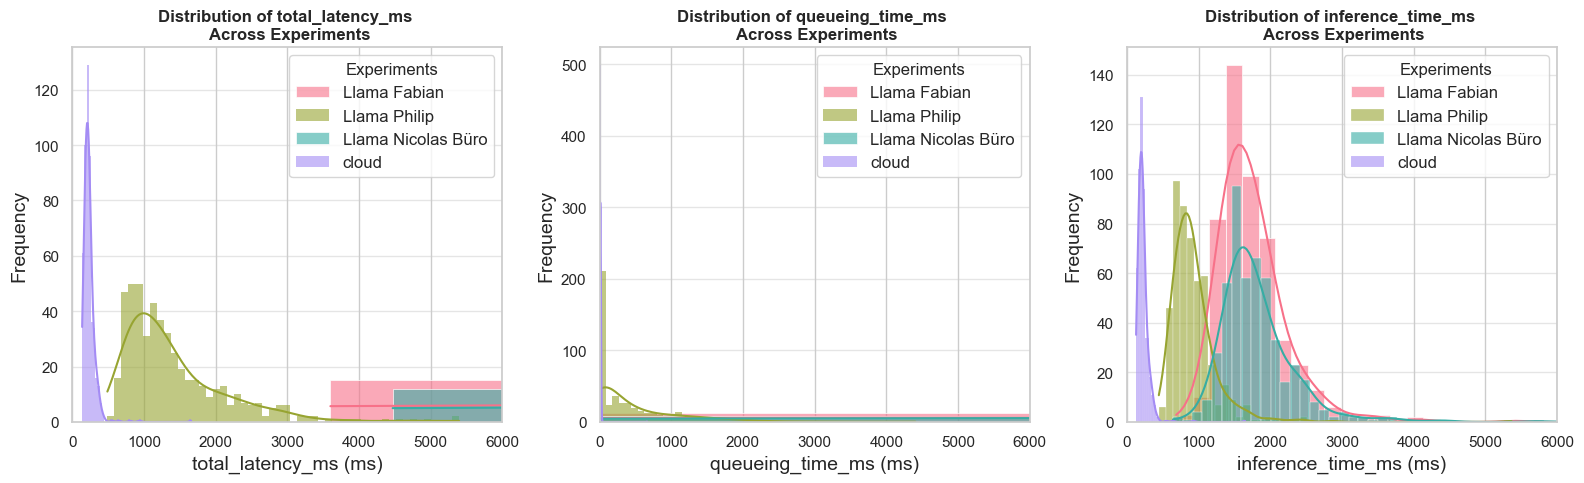

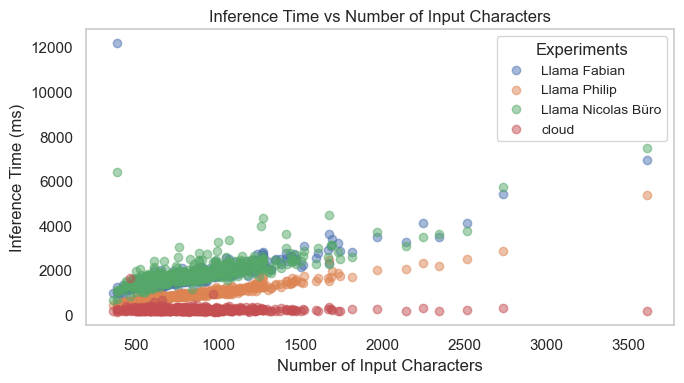

Correlation between number of characters and inference time for Llama Fabian: 0.6595012838309482
Correlation between number of characters and inference time for Llama Philip: 0.9475230235867872
Correlation between number of characters and inference time for Llama Nicolas Büro: 0.7711670339595154
Correlation between number of characters and inference time for cloud: -0.04270329808217123


In [ ]:
# Prepare the data for plotting
experiment_data = [
    raw_dfs['fabian/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-03T20-58-00'],
    raw_dfs['philip/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T08-10-53'],
    raw_dfs['nicolas-office/lenovo_büro_raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T13-03-58'],
    raw_dfs['cloud/cloud_raw_experiment_meta-llama-llama-3-2-1b-instruct_always_cloud_once-per-sec_2025-12-04T16-10-54']
]

labels = ['Llama Fabian', 'Llama Philip', 'Llama Nicolas Büro', 'cloud']

# plot time measure distributions
plot_time_measures_overlaid(experiment_data, labels)

# plot inference vs input character amount
plot_characters_vs_inference_time(experiment_data, labels)

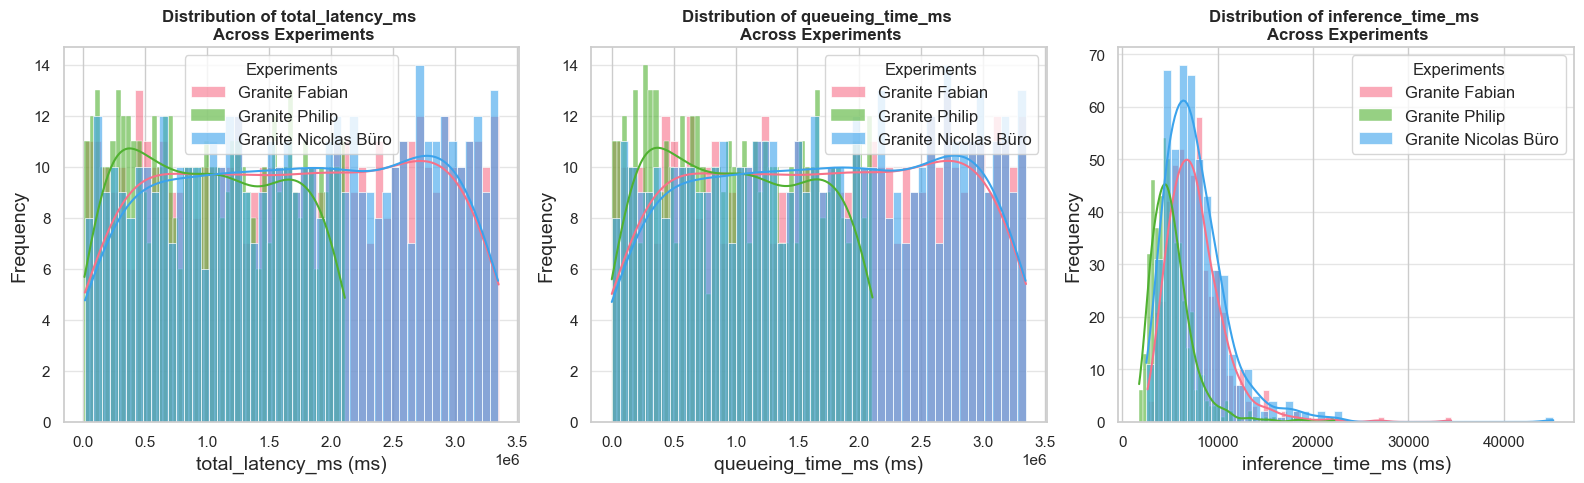

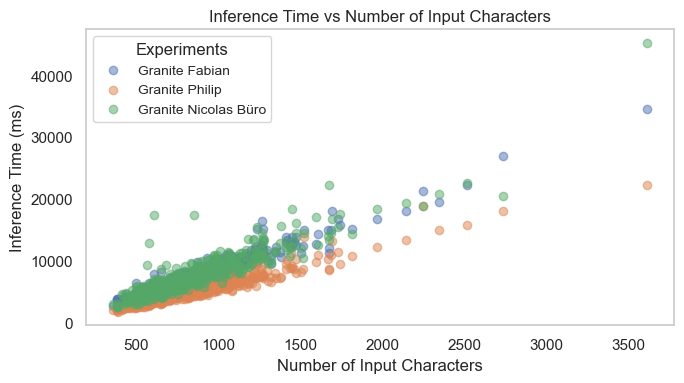

Correlation between number of characters and inference time for Granite Fabian: 0.9656557198442164
Correlation between number of characters and inference time for Granite Philip: 0.9535457786861865
Correlation between number of characters and inference time for Granite Nicolas Büro: 0.9125806954552317


In [ ]:
# Prepare the data for plotting
experiment_data_granite = [
    raw_dfs['fabian/raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-03T22-46-10'],  # Updated key for Fabian
    raw_dfs['philip/raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-04T09-03-29'],  # Correct key for Philip
    raw_dfs['nicolas/lenovo_büro_raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-04T12-29-10']  # Correct key for Nicolas
]

labels_granite = ['Granite Fabian', 'Granite Philip', 'Granite Nicolas Büro']

# Plot time measure distributions for Granite experiments
plot_time_measures_overlaid(experiment_data_granite, labels_granite)

# Plot inference vs input character amount for Granite experiments
plot_characters_vs_inference_time(experiment_data_granite, labels_granite)

## n) Analyisis of Latency per Model and Device
This analyiss is used to show the mean and median latency as well as the variance in latency for the on device models of different configurations. Those numbers can be copied to the report.

In [ ]:
# filter raw_df such that only entries with fabian in the path are kept
fabian_raw_dfs = {key: df for key, df in raw_dfs.items() if 'fabian' in key}

In [ ]:
def analyze_latency_statistics_for_one_device(name: str, route: str = 'device') -> pd.DataFrame:
    # filter all the raw dataframes which contain name in their key (e.g. 'fabian' for all datasets from fabian)
    subset_raw_df = {key: df for key, df in raw_dfs.items() if name in key}

    latency_stats = {}
    for key, df in subset_raw_df.items():
        if 'inference_time_ms' not in df.columns:
            continue

        series = df['inference_time_ms'].dropna()
        mean_latency = series.mean()
        median_latency = series.median()
        std_latency = series.std()
        q25 = series.quantile(0.25)
        q75 = series.quantile(0.75)
        iqr_latency = q75 - q25

        mean_accuracy = df['exact_match'].mean() if 'exact_match' in df.columns else None
        device_model = df['device_model'][0]
        cloud_model = df['cloud_model'][0]

        model_name = cloud_model if route == 'cloud' else device_model

        latency_stats[model_name] = {
            'mean_latency_ms': round(mean_latency, 2),
            'median_latency_ms': round(median_latency, 2),
            'std_latency_ms': round(std_latency, 2),
            'iqr_latency_ms': round(iqr_latency, 2),
            'q25_latency_ms': round(q25, 2),
            'q75_latency_ms': round(q75, 2),
            'mean_accuracy': round(mean_accuracy, 2),
            'dataset_name': key
        }

    # convert to a dataframe
    return pd.DataFrame.from_dict(latency_stats, orient='index')


In [ ]:
# print the dataframe
analyze_latency_statistics_for_one_device('fabian')

,mean_latency_ms,median_latency_ms,std_latency_ms,iqr_latency_ms,q25_latency_ms,q75_latency_ms,mean_accuracy,dataset_name
onnx-community/Llama-3.2-1B-Instruct-ONNX,1773.50,1638.0,708.28,513.75,1436.50,1950.25,0.59,fabian/raw_experiment_Llama-3-2-1B-Instruct-ON...
onnx-community/Qwen3-4B-ONNX,11032.70,10638.0,4203.47,4612.75,8359.00,12971.75,0.74,fabian/raw_experiment_Qwen3-4B-ONNX_always_dev...
onnx-community/gemma-3-270m-it-ONNX,737.04,615.0,412.31,330.00,488.75,818.75,0.64,fabian/raw_experiment_gemma-3-270m-it-ONNX_alw...
onnx-community/granite-4.0-micro-ONNX-web,7697.68,7186.5,3188.96,3321.00,5633.75,8954.75,0.79,fabian/raw_experiment_granite-4-0-micro-ONNX-w...


In [ ]:
analyze_latency_statistics_for_one_device('philip')

,mean_latency_ms,median_latency_ms,std_latency_ms,iqr_latency_ms,q25_latency_ms,q75_latency_ms,mean_accuracy,dataset_name
onnx-community/gemma-3-270m-it-ONNX,387.39,351.0,245.20,117.25,308.75,426.00,0.63,philip\raw_experiment_gemma-3-270m-it-ONNX_alw...
onnx-community/granite-4.0-micro-ONNX-web,5210.40,4781.5,2337.95,2373.00,3694.75,6067.75,0.79,philip\raw_experiment_granite-4-0-micro-ONNX-w...
onnx-community/Llama-3.2-1B-Instruct-ONNX,932.35,856.0,359.42,342.50,717.00,1059.50,0.62,philip\raw_experiment_Llama-3-2-1B-Instruct-ON...
onnx-community/Qwen3-4B-ONNX,7051.97,6471.0,2908.20,3161.50,5103.50,8265.00,0.74,philip\raw_experiment_Qwen3-4B-ONNX_always_dev...


In [ ]:
analyze_latency_statistics_for_one_device('nicolas-privat')

,mean_latency_ms,median_latency_ms,std_latency_ms,iqr_latency_ms,q25_latency_ms,q75_latency_ms,mean_accuracy,dataset_name
onnx-community/gemma-3-270m-it-ONNX,392.57,350.0,236.90,149.00,291.00,440.00,0.64,nicolas-privat\lenovo_privat_raw_experiment_ge...
onnx-community/granite-4.0-micro-ONNX-web,4102.27,3753.0,1927.83,1775.75,2993.25,4769.00,0.79,nicolas-privat\lenovo_privat_raw_experiment_gr...
onnx-community/Llama-3.2-1B-Instruct-ONNX,939.42,906.0,218.13,197.25,820.00,1017.25,0.61,nicolas-privat\lenovo_privat_raw_experiment_Ll...
onnx-community/Qwen3-4B-ONNX,6435.64,6273.5,2659.83,3006.00,4553.25,7559.25,0.75,nicolas-privat\lenovo_privat_raw_experiment_Qw...


In [ ]:
analyze_latency_statistics_for_one_device('nicolas-office')

,mean_latency_ms,median_latency_ms,std_latency_ms,iqr_latency_ms,q25_latency_ms,q75_latency_ms,mean_accuracy,dataset_name
onnx-community/gemma-3-270m-it-ONNX,690.36,631.0,378.24,229.25,538.0,767.25,0.63,nicolas-office\lenovo_büro_raw_experiment_gemm...
onnx-community/granite-4.0-micro-ONNX-web,7671.17,6977.0,3608.71,3815.00,5310.5,9125.50,0.79,nicolas-office\lenovo_büro_raw_experiment_gran...
onnx-community/Llama-3.2-1B-Instruct-ONNX,1834.74,1719.5,608.60,467.75,1520.5,1988.25,0.62,nicolas-office\lenovo_büro_raw_experiment_Llam...


# Queueing Models
Here we try to simulate a queueing model that behaves like the empirically generated data. In a second step we then want to combine on-device and cloud into a multi-server model, to come up with a smart decision policy.

In [ ]:
from utils import *

In [ ]:
lambda_val, mu_val, s_times, ia_times = fit_mm1_model(raw_dfs['philip/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T08-10-53'])

--- M/M/1 Fit Results ---
Estimated λ (Arrival Rate): 0.9932 jobs/sec
Estimated μ (Service Rate): 1.0726 jobs/sec
Traffic Intensity (ρ): 0.9260

Comparison (Seconds):
Theoretical Avg Total Latency (W): 12.5977 s
Empirical Avg Total Latency:     1.4275 s
Theoretical Avg Queue Time (Wq): 11.6654 s
Empirical Avg Queue Time:        0.4951 s


In [ ]:
# 1. Get rates from On-Device Experiment
print("--- On-Device Data ---")
lambda_device, mu_device, _, _ = fit_mm1_model(raw_dfs['philip/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T08-10-53'])

# 2. Get rates from Cloud Experiment
print("\n--- Cloud Data ---")
cloud_key = 'cloud/cloud_raw_experiment_meta-llama-llama-3-2-1b-instruct_always_cloud_once-per-sec_2025-12-04T16-10-54'
lambda_cloud, mu_cloud, _, _ = fit_mm1_model(raw_dfs[cloud_key])

# 3. Combine them into a 2-Server System
# We assume the total arrival rate is the sum of both experiments (or you can set a target lambda)
total_lambda = lambda_device + lambda_cloud 

print("\n--- Combined System (M/M/2) ---")
# We pass the two different service rates
fit_mmc_model(total_lambda, [mu_device, mu_cloud], c=2)

--- On-Device Data ---
--- M/M/1 Fit Results ---
Estimated λ (Arrival Rate): 0.9932 jobs/sec
Estimated μ (Service Rate): 1.0726 jobs/sec
Traffic Intensity (ρ): 0.9260

Comparison (Seconds):
Theoretical Avg Total Latency (W): 12.5977 s
Empirical Avg Total Latency:     1.4275 s
Theoretical Avg Queue Time (Wq): 11.6654 s
Empirical Avg Queue Time:        0.4951 s

--- Cloud Data ---
--- M/M/1 Fit Results ---
Estimated λ (Arrival Rate): 0.9936 jobs/sec
Estimated μ (Service Rate): 4.4725 jobs/sec
Traffic Intensity (ρ): 0.2222

Comparison (Seconds):
Theoretical Avg Total Latency (W): 0.2874 s
Empirical Avg Total Latency:     0.2355 s
Theoretical Avg Queue Time (Wq): 0.0639 s
Empirical Avg Queue Time:        0.0119 s

--- Combined System (M/M/2) ---
--- M/M/2 Model Results ---
Combined Arrival Rate (λ): 1.9868
Avg Service Rate (μ): 2.7725
Traffic Intensity (ρ): 0.3583
Theoretical Avg Queue Time (Wq): 0.0531 s
Theoretical Avg Total Latency (W): 0.4138 s


(np.float64(0.4138023166752707), np.float64(0.05312160231169754))

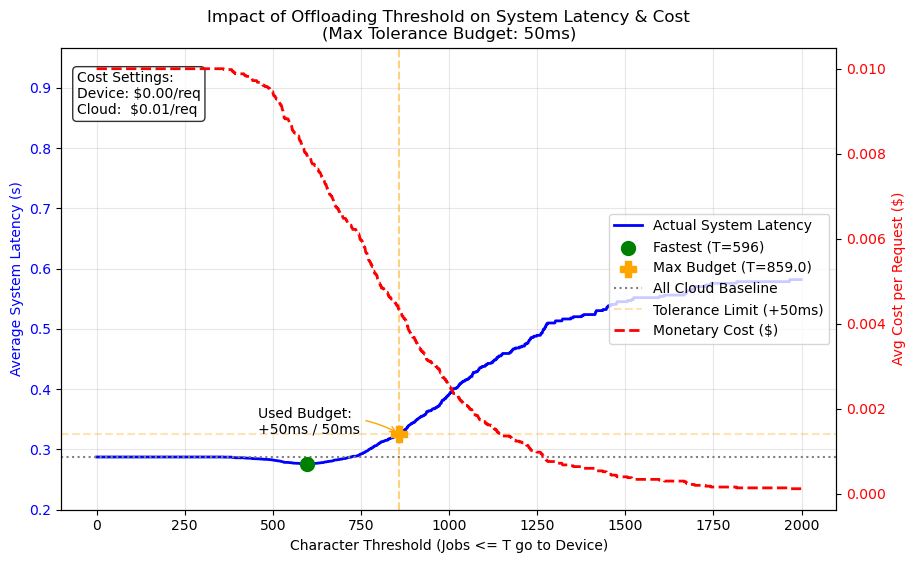

--- Performance vs. Budget Analysis ---
1. Fastest Configuration:
   - Threshold: 596 chars
   - Latency:   0.2761 s
   - Avg Cost:  $0.0080

2. Max Budget Configuration (Spending up to 50ms):
   - Threshold: 859.0 chars
   - Latency:   0.3258 s (+49.7ms)
   - Avg Cost:  $0.0043

   -> You save $0.0036 per request by using your latency budget.


In [ ]:
# --- Usage Example ---
thresholds = range(0, 2000, 1)
tolerance = 50      # how much slower (in ms) do we allow the on device model to be in comparison to the cloud model
cost_device = 0.00
cost_cloud = 0.01

df_cloud_ex = raw_dfs['cloud/cloud_raw_experiment_meta-llama-llama-3-2-1b-instruct_always_cloud_once-per-sec_2025-12-04T16-10-54']
df_device_ex = raw_dfs['philip/raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-04T08-01-13']

_ = run_full_analysis(df_device_ex, df_cloud_ex, thresholds, tolerance, cost_device, cost_cloud)

## Coming up with a routing policy
We want to find out the optimal Threshold T here for our "smart" scheduling policy. On the hardware we tested, mostly the cloud based inference was faster than on-device. We expect that in the future models will get faster and more people will have more access to higher performance hardware in their devices, thats why we lower the inference time for the on-device models by multiplying it with a `on_device_speedup_factor` and performing a linear shift with `on_device_speedup_shift`.

In [99]:
from utils import *

df_cloud_ex = raw_dfs['cloud/cloud_raw_experiment_meta-llama-llama-3-2-1b-instruct_always_cloud_once-per-sec_2025-12-04T16-10-54'].copy()
df_device_ex = raw_dfs['philip/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T08-10-53'].copy()


on_device_speedup_factor = 0.6
on_device_speedup_shift = 300 #linear shift factor in ms

on_device_speedup_factor = 0.6
on_device_speedup_shift = 300 #linear shift factor in ms

# Apply speedup factor to device inference times
print(f"Applying speedup factor {on_device_speedup_factor} and shift -{on_device_speedup_shift}ms...")

# clip(lower=1.0) to prevent negative inference times!
df_device_ex['inference_time_ms'] = (df_device_ex['inference_time_ms'] * on_device_speedup_factor - on_device_speedup_shift).clip(lower=1.0)

# WARNING: We cannot simply recalculate total_latency_ms here.
# The old 'queueing_time_ms' is invalid because a faster device would have had a much smaller queue.
# We must rely on the M/G/1 simulation to estimate the new total latency.

# Recalculate total latency to maintain consistency (Total = Queue + Inference). ... (Don't do this if you want accurate total stats)
# df_device_ex['total_latency_ms'] = df_device_ex['queueing_time_ms'] + df_device_ex['inference_time_ms']


Applying speedup factor 0.6 and shift -300ms...


We now extract basic per-server metrics from the (manipulated) experiment data.

In [100]:
from utils import *

extract_basic_metrics(df_device_ex, "On-Device (Gemma)")
extract_basic_metrics(df_cloud_ex, "Cloud (Llama)")

--- Metrics for On-Device (Gemma) ---
  Count:                   500
  Duration:                503.43 s
  Arrival Rate (λ):        0.9932 req/s
  Mean Service Demand (S): 0.2597 s
  Mean Response Time (R):  1.4275 s
  Response Time P95:       2.8712 s
  Utilization (ρ = λ*S):   25.80%
------------------------------
--- Metrics for Cloud (Llama) ---
  Count:                   500
  Duration:                502.48 s
  Arrival Rate (λ):        0.9951 req/s
  Mean Service Demand (S): 0.2236 s
  Mean Response Time (R):  0.2355 s
  Response Time P95:       0.3540 s
  Utilization (ρ = λ*S):   22.25%
------------------------------


{'lambda': 0.9950644801783155,
 'mean_service_time': np.float64(0.22358799999999998),
 'mean_response_time': np.float64(0.23551599999999998),
 'p95_response_time': np.float64(0.3540499999999999),
 'utilization': np.float64(0.2224844769941092)}

Using the basic per-server metrics we fit a queueing model per server using the measured service time distribution. To find out if we need a M/M/1 or a M/G/1 model, we first plot the distribution of the service times. If the look roughly exponential, we go for M/M/1, otherwise for M/G/1.

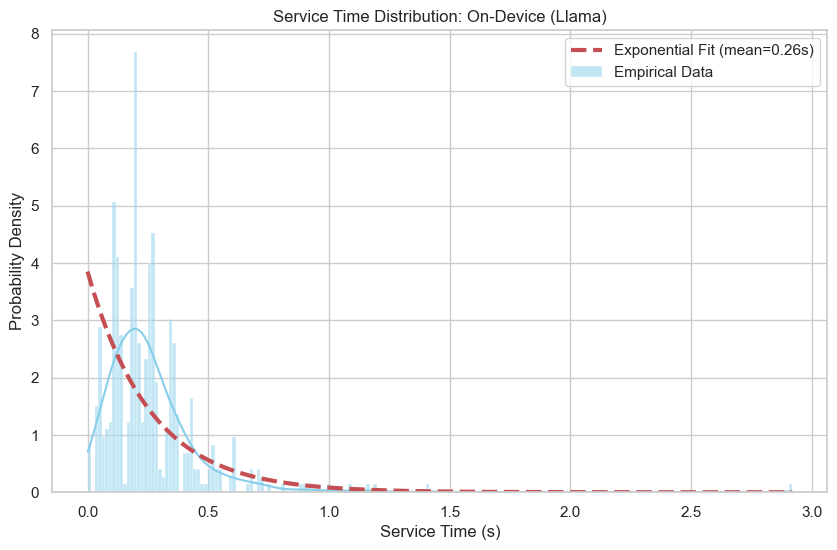

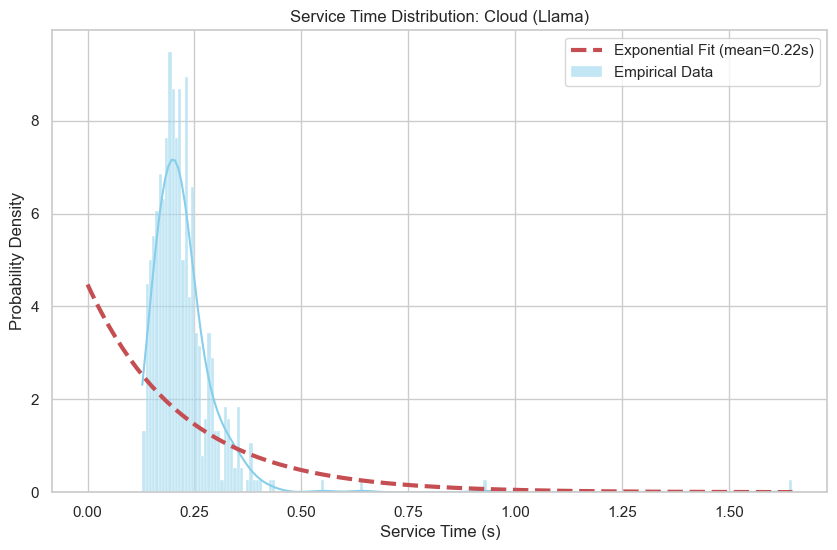

In [101]:
plot_service_time_distribution(df_device_ex, "On-Device (Llama)")
plot_service_time_distribution(df_cloud_ex, "Cloud (Llama)")

from the service time distribution plots we can clearly see, that we have no exponential distribution. therefore we choose to use M/G/1 queue. 


**see slides lecture 10, page 25 to 27**

In slide 26 we can find the formula for the expected waiting time $E[T_Q]$ in an M/G/1 queue:
$$
E[T_Q] \;=\; \frac{\rho}{1-\rho} \cdot \frac{E[S^2]}{2E[S]},
$$  

If we use $\rho = \lambda E[S]$ we can come up with the common form of Pollaczek-Khinchine (PK) formula:
$$
E[T_Q] \;=\; \frac{\lambda E[S^2]}{2(1-\rho)},
\quad \rho = \lambda E[S].
$$  


- The factor $\rho/(1-\rho)$ captures the load effect: as utilization approaches 1, waiting time explodes.
- The factor $E[S^2]/(2E[S])$ captures variability of service time; through $E[S^2]$ it is directly tied to $\text{Var}(S)$ and the coefficient of variation highlighted in the slide. 

System Lambda: 0.0171 req/s (over 500 jobs)


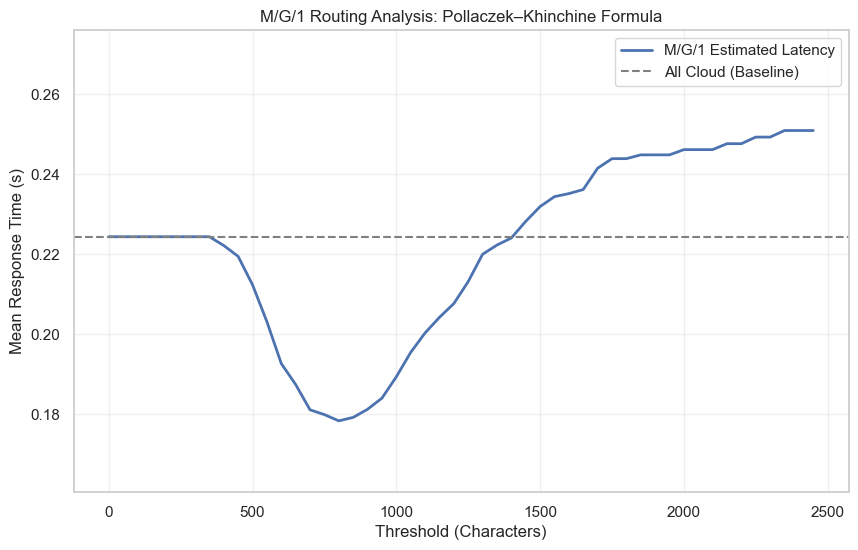

In [102]:
from utils import *

# --- Run Analysis ---
thresholds = range(0, 2500, 50)
mg1_results = analyze_routing_mg1(df_device_ex, df_cloud_ex, thresholds)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mg1_results['threshold'], mg1_results['avg_latency'], label='M/G/1 Estimated Latency', linewidth=2)
plt.axhline(y=mg1_results.iloc[0]['avg_latency'], color='gray', linestyle='--', label='All Cloud (Baseline)')
finite_vals = mg1_results[mg1_results['avg_latency'] != float('inf')]['avg_latency']
upper_lim = finite_vals.max() * 1.1 if not pd.isna(finite_vals.max()) else 2.0
lower_lim = max(0, finite_vals.min() * 0.9) if not pd.isna(finite_vals.min()) else 0
plt.ylim(lower_lim, upper_lim)
plt.xlabel('Threshold (Characters)')
plt.ylabel('Mean Response Time (s)')
plt.title('M/G/1 Routing Analysis: Pollaczek–Khinchine Formula')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**how to interpret the plot:**
- X-Axis is the Threshold we set. Any prompt with less characters than T is sent to local device, anything longer goes to the cloud. 
- Y-Axis is the Mean Response Time $E[R]$ for the combined system (device and cloud). It's the weighted weighted average time of requests served by device and cloud.
- The optimal Threshold is the minimum of the curve